# Lesson 4.3: Feature Methods & Advanced Regular Expressions

### Lesson Duration: 3 hours

> Purpose: The purpose of this lesson is to explain the differences between _feature engineering_, _feature extraction_, and _feature selection_. The students will learn to apply feature extraction methods and we will also revisit some of the feature selection methods used in the previous classes. We will talk about advanced regular expressions.

---

### Setup

- All previous set up
- Use the same Jupyter notebook as you would have used in 4.1 and 4.2

### Learning Objectives

After this lesson, students will be able to:

- Use advanced regular expressions
- Explain the difference between feature engineering, feature extraction, and feature selection methods
- Conduct feature extraction to get more relevant features for modeling data
- Revisit some feature elimination techniques including _correlations_, _heat maps_, _chi square tests_

---

### Lesson 1 key concepts

> :clock10: 20 min

Advanced regular expressions

- Revisit regular expressions
- Using quantifiers
- Using other metacharacters

Code Sample: Revisit regular expressions
    

Remember: Quantifiers

- `*`: Matches previous character 0 or more times
- `+`: Matches previous character 1 or more times
- `?`: Matches previous character 0 or 1 times (optional)
- `{}`: Matches previous characters however many times specified within:
- `{n}`: Exactly n times
- `{n,}`: At least n times
- `{n,m}`: Between n and m times

In [1]:
import re
text = "That person wears marvelous trousers."
pattern = 'er'
re.findall(pattern, text)

['er', 'er']

In [2]:
pattern = '[er]'
re.findall(pattern, text)

['e', 'r', 'e', 'r', 'r', 'e', 'r', 'e', 'r']

In [3]:
text = "Is it spelled gray or grey?"
# text = "Is it spelled gry or grey?"
pattern = 'gr[ae]y'
re.findall(pattern, text)

['gray', 'grey']

In [4]:
text = '''TKerraPower, A nuclear-energy company founded by Bill Gates,
        is unlikely to follow through on building a demonstration reactor in China,
        due largely to the Trump administration�s crackdown on the country'''

pattern = '[A-Z][a-z]*'
print(re.findall(pattern, text))

['T', 'Kerra', 'Power', 'A', 'Bill', 'Gates', 'China', 'Trump']


In [5]:
pattern = '[A-z]+'
#pattern = '[A-Z][a-z]+'
print(re.findall(pattern, text))

['TKerraPower', 'A', 'nuclear', 'energy', 'company', 'founded', 'by', 'Bill', 'Gates', 'is', 'unlikely', 'to', 'follow', 'through', 'on', 'building', 'a', 'demonstration', 'reactor', 'in', 'China', 'due', 'largely', 'to', 'the', 'Trump', 'administration', 's', 'crackdown', 'on', 'the', 'country']


Code Sample: Metacharacters

- `\w`: Any alphanumeric character.
- `\W`: Any non-alphanumeric character.
- `\d`: Any numeric character.
- `\D`: Any non-numeric character.
- `\s`: Any whitespace characters.
- `\S`: Any non-whitespace characters.

In [6]:
text = "If you tell the truth, you don't have to remember anything 100."

#pattern = '\w'
#pattern = '\w+'
#pattern = '\w*'
#pattern = '\w?'
pattern = '.'
print(re.findall(pattern, text))

['I', 'f', ' ', 'y', 'o', 'u', ' ', 't', 'e', 'l', 'l', ' ', 't', 'h', 'e', ' ', 't', 'r', 'u', 't', 'h', ',', ' ', 'y', 'o', 'u', ' ', 'd', 'o', 'n', "'", 't', ' ', 'h', 'a', 'v', 'e', ' ', 't', 'o', ' ', 'r', 'e', 'm', 'e', 'm', 'b', 'e', 'r', ' ', 'a', 'n', 'y', 't', 'h', 'i', 'n', 'g', ' ', '1', '0', '0', '.']


In [7]:
text = "If you tell the truth, you don't have to remember anything 100."
pattern = '\w{4}'
#pattern = '\w{4,}'
print(re.findall(pattern, text))

['tell', 'trut', 'have', 'reme', 'mber', 'anyt', 'hing']


In [8]:
text = """
Aeromexico 800-237-6639
Air Canada 888-247-2262
Air Canada Rouge 888-247-2262
Air Creebec 800-567-6567
Air Inuit 800-361-2965
Air North 800-661-0407
Air Tindi 888-545-6794"""
pattern = '\d+-\d+-\d+'
re.findall(pattern, text)

['800-237-6639',
 '888-247-2262',
 '888-247-2262',
 '800-567-6567',
 '800-361-2965',
 '800-661-0407',
 '888-545-6794']

# 4.03 Activity 1

1. In the following example, the numbers are not formatted well. As you might see, there is some misalignment in terms of spaces. How will you extract all the phone numbers?

In [9]:
text = """
Aeromexico 800 - 237 - 6639
Air Canada 888- 247-2262
Air Canada Rouge 888-247-2262
Air Creebec 800-567-6567
Air Inuit 800-361-2965
Air North 800-661-0407
Air Tindi 888-545-6794"""

In [10]:
pattern = '\d+\s*-\d+\s*\s*-\d+'

In [11]:
lst = re.findall(pattern, text)

2. Find all names in the text provided. The output should look like `['KerraPower', 'Bill Gates', 'China', 'Trump']`

In [12]:
text = '''TKerraPower, A nuclear-energy company founded by Bill Gates,
        is unlikely to follow through on building a demonstration reactor in China,
        due largely to the Trump administration�s crackdown on the country'''

In [13]:
pattern = '\w*[A-Z][a-z]+'
print(re.findall(pattern, text))

['TKerraPower', 'Bill', 'Gates', 'China', 'Trump']


### Lesson 2 key concepts

> :clock10: 20 min

Introduction to feature engineering

- Feature extraction
- Feature selection



- **Feature engineering** is a process of transforming the given data into a form that is easier to interpret. All the techniques that we have used before including data transformations techniques, encoding categorical variables, scaling numerical features, imputing missing values, cleaning categorical columns, using regular expressions, using DateTime, and string functions are feature engineering techniques. The key idea is that we are manipulating the information that is available to us to be able to better understand it and improve the model.

- **Feature extraction/feature generation**: It is the process of extracting relevant information from the existing available information. For example, you are provided with the date of birth of customers in the data. You are not interested in when they were born but more interested in their age. In that case, you can use the DateTime functions to calculate the age or extract other relevant information such as the year they were born, the month they were born.


- **Feature selection**: This is the process of selecting the features/columns in your data that are relevant to the model, for eg. if it is a prediction problem, you will be more interested in only those variable that have an impact on your target and not other columns/features that are not providing any information about target. Adding variables that don't add value to the model degrades the performance of the model both in terms of accuracy and in terms of efficiency.

Some of the feature selection methods that we took a look at earlier include:

- Checking null values to drop a column
- Sense check to drop columns that are not significant
- Using heat maps to check multicollinearity for numerical variables
- Chi-square tests for categorical variables

Code Sample:

Here we will use the column `DOB` to calculate the age of the client. As you can see, there are a lot of clients for whom the `DOB` is not known, so it is marked as 0. If we check, we will see that there are a lot of such clients so we can't just filter it out as we would lose a lot of data. So we would calculate the average age and later replace those **0**'s with mean age.

In [14]:
#importing libraries
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
pd.set_option('display.max_columns', None)

Let's take the data already cleaned from the previous lesson 4.02:

In [15]:
with open('./files_for_lesson_and_activities/data_cleaned.pickle', 'rb') as fp:
    data = pickle.load(fp)

In [16]:
data.head(1)

,STATE,DOB,MDMAUD,DOMAIN,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT,ic2_
0,IL,3712,XXXX,T2,NaN,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,L4E,31,4.0,7.741935,Low


In [17]:
# to check the number of clients for which this info is missing
len(data[data['DOB']==0])

22507

- In the DOB column, the format is `YYMM`. We will use this info to get the year when they were born.

In [18]:
import re
def year(x):
    x = str(x)
    if len(x)<4:
        return np.nan
    else:
        pattern = '\d\d'
        yr = re.findall(pattern,x)[0]
        return int(yr)

- Note that our reference year is _1997_ here as the data is from that study.

In [19]:
data['year'] = data['DOB'].apply(year)
data['year'] = 97 - data['year']

In [20]:
data['year'] = data['year'].fillna(np.mean(data['year']))

In [21]:
# Now we can drop the column DOB as we have extracted the information we need from this column
data = data.drop(['DOB'], axis=1)

# 4.03 Activity 2

Use the column `DOMAIN` (in the `unit4.csv` file you used for the previous activities) to categorize the column based on the first letter of the input

- _U=Urban_
- _C=City_
- _S=Suburban_
- _T=Town_
- _R=Rural_
- Replace the blanks with NaNs. Then replace these NaNs with the most frequent category in the column

In [22]:
data['DOMAIN']

0        T2
1        S1
2        R2
3        R2
4        S2
         ..
90564    S2
90565    C2
90566    C1
90567    C3
90568    C1
Name: DOMAIN, Length: 90569, dtype: object

In [23]:
data['DOMAIN'].value_counts()

R2    13006
T2    11717
S1    10866
S2     8054
C2     7834
C1     5793
C3     5056
T1     4712
R3     4572
U1     4259
U2     3111
U3     2484
T3     2092
S3     1817
U4     1735
R1     1285
Name: DOMAIN, dtype: int64

In [27]:
domain_categories = {"U": "Urban", "C": "City", "S": "Suburban", "T":  "Town", "R": "Rural"}

In [28]:
domain_categories.keys()

dict_keys(['U', 'C', 'S', 'T', 'R'])

In [42]:
def clean_domain(x):
    if x != x: 
        return np.nan
    if x[0] in domain_categories.keys():
        return domain_categories[x[0]]
    else:
        return np.nan

In [43]:
data['DOMAIN'].apply(clean_domain)

0            Town
1        Suburban
2           Rural
3           Rural
4        Suburban
           ...   
90564    Suburban
90565        City
90566        City
90567        City
90568        City
Name: DOMAIN, Length: 90569, dtype: object

In [44]:
dict_values(['Urban', 'City', 'Suburban', 'Town', 'Rural'])

NameError: name 'dict_values' is not defined

### Lesson 3 key concepts

> :clock10: 20 min

Revisiting feature selection techniques 

- Checking null values to drop a column (discuss)
- Sense check to drop columns that are not significant (discuss)

      - Only a very very brief introduction to reinforce feature selection. We have looked at these techniques earlier in-depth already.

- Using heat maps to check multicollinearity for numerical variables (in detail and as an introduction to statistical significance and p values)

**Multicollinearity: Discussion**

Through multivariate linear regression, we are trying to assess the influence of each of the predictor variables on the target variable. This influence/relationship is linear and is represented by a mathematical equation. The equation is given as: `Y=β0+β1X1+β2X2+β3X3+β4X4+........+βnXn`.
Here, each variable is trying to explain some information about the nature of `Y`, how does `Y` change with each of the predictor variables. The change in `Y` with `X` is technically variation. When the predictor variables are all independent of each other, each variable explains some information on the change in `Y`. Multicollinearity arises when the predictor variables are highly correlated. Hence some predictors are redundant as they do not reveal any new information on the change in `Y` with a change in `X`.

The correlation matrix using the heat maps helps us understand the correlation between the independent variables.
Using the `sklearn.metrics` module we calculate `R` square statistic. It measures the proportion of variance in the dependent variable that is explained by all of the independent variables.

For checking multicollinearity, we calculate `R` square `k` and `VIF` (variance inflation factor) for each of the `k` independent variables. We do this by regressing the `k`-th independent variable on all of the other independent variables. That is, we treat `X` `k` as the dependent variable and use the other independent variables to predict `X` `k`.

For eg. `Y=β0+β1X1+β2X2+β3X3+β4X4`

Build a model `X1` vs. `X2 X3 X4`, find `R^2`, call it `R1`.
Build a model `X2` vs. `X1 X3 X4`, find `R^2`, call it `R2`.
and so on and so forth

**Interpreting R square k** - If `R2k `equals zero, variable `k` is not correlated with any other independent variable.
Usually, multicollinearity is a potential problem when `R2k` is greater than `0.75` and, a serious problem when `R2k` is greater than `0.9`.

For each variable that we find individual R2, `VIF = 1 / ( 1 - R2k )` (for each dependent variable `k`). It is used to assess multicollinearity.

**Interpretation of the variance inflation factor**: If `VIFk = 1`, variable k is not correlated with any other independent variable. Multicollinearity is a potential problem when `VIFk` is greater than 4 and, a serious problem when it is greater than 10.

### Effects of Multicollinearity:

1. It makes it harder to interpret the significance of variables in the regression model (we will talk about statistical significance/p-value later).
2. It might give good enough results due to over-fitting, but those will not be very reliable (we will talk about over-fitting and under-fitting in more detail later. Over-fitting for now, you can explain to the students as a more complicated model and not very generalized ie it might work on the data at hand very well but not so well on the unknown/out of the box data.
3. It is also important to note that it does not severely impact the model in terms of predicting power if the only prediction is the main goal of the analysis.

Dealing with High Multicollinearity:

1. Centering/standardizing/normalizing variables may help reduce multicollinearity.
2. Removing one or more of the variables that are highly correlated with each other.

# 4.03 Activity 3

Keep working with `unit4.csv` you that you already have locally.

Check multicollinearity for numerical variables using correlation:

- Generate correlation matrix
- Generate regression plots for highly correlated variables
- Calculate R2 for highly correlated variables

**Solution to Activity 3:**

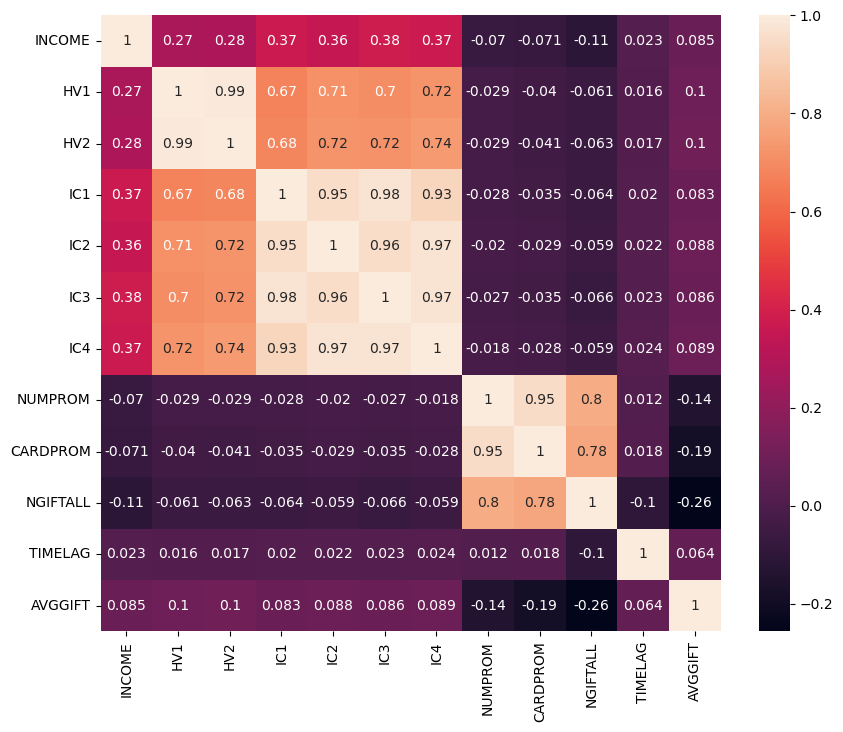

In [45]:
data_corr = data[['INCOME', 'HV1', 'HV2', 'IC1', 'IC2', 'IC3', 'IC4', 'NUMPROM', 'CARDPROM', 'NGIFTALL', 'TIMELAG', 'AVGGIFT']]
data_corr['INCOME'].fillna(np.mean(data_corr['INCOME']), inplace=True)
data_corr['TIMELAG'].fillna(np.mean(data_corr['TIMELAG']), inplace=True)

corr_matrix=data_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

<AxesSubplot:xlabel='HV1', ylabel='HV2'>

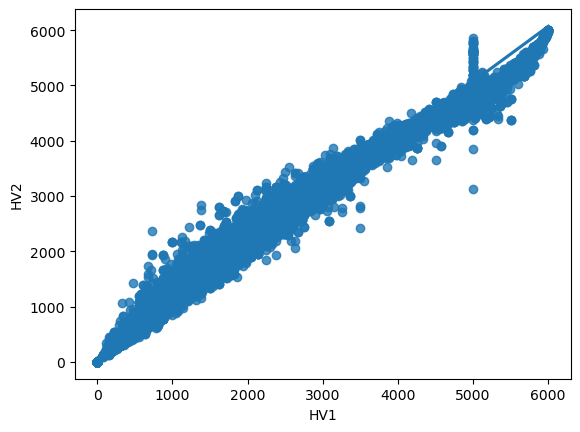

In [46]:
sns.regplot('HV1','HV2', data=data_corr)

<AxesSubplot:xlabel='IC1', ylabel='IC2'>

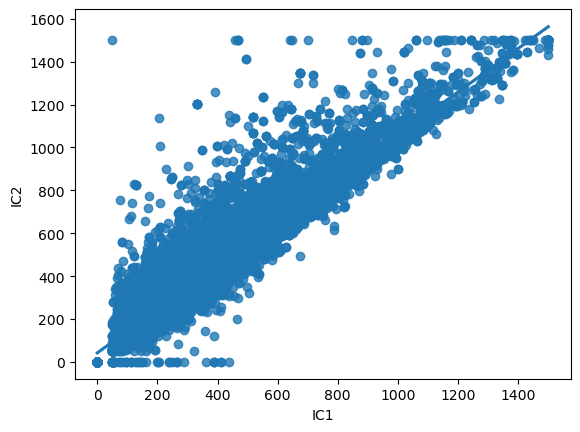

In [47]:
sns.regplot('IC1','IC2', data=data_corr)

<AxesSubplot:xlabel='IC1', ylabel='IC3'>

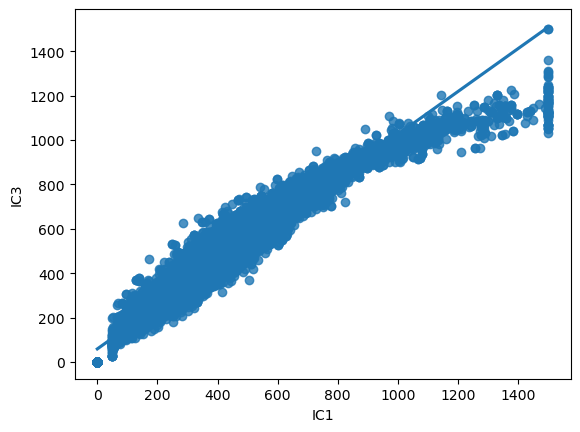

In [48]:
sns.regplot('IC1','IC3', data=data_corr)

<AxesSubplot:xlabel='IC1', ylabel='IC4'>

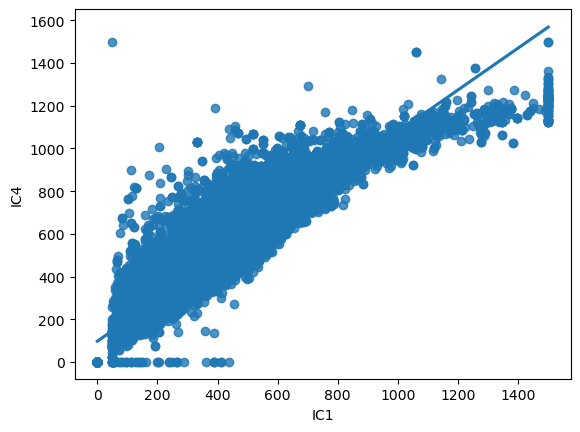

In [49]:
sns.regplot('IC1','IC4', data=data_corr)

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
model = LinearRegression().fit(data_corr[['HV1']], data_corr[['HV2']])
model.score(data_corr[['HV1']], data_corr[['HV2']])

0.9867454151306594

In [52]:
model = LinearRegression().fit(data_corr[['IC1']], data_corr[['IC2']])
model.score(data_corr[['IC1']], data_corr[['IC2']])

0.9047338877534138

### Lesson 4 key concepts

> :clock10: 20 min

Implementing the `VIF` technique for feature selection.

Code Sample: Implementing VIF technique for feature selection

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [54]:
range(data_corr.shape[1])

range(0, 12)

In [55]:
# This is the code to show how to use the __variance_inflation_factor__ function
# We are using add_constant here as VIF method in python expects the addition of a constant terms in the X features. It uses OLS but does not add the constant itself.

vif = {}
data_corr = add_constant(data_corr)
for i in range(data_corr.shape[1]):
    column_name = data_corr.columns[i]
    value = variance_inflation_factor(np.array(data_corr), i)
    vif[column_name] = value

In [56]:
vif

{'const': 19.8870258747642,
 'INCOME': 1.1816980325968618,
 'HV1': 85.6163971300884,
 'HV2': 90.30152036139914,
 'IC1': 49.74849082123008,
 'IC2': 43.06133277558236,
 'IC3': 86.23409255089082,
 'IC4': 68.51751132235582,
 'NUMPROM': 11.527793105235444,
 'CARDPROM': 10.56616072292937,
 'NGIFTALL': 3.015611929986518,
 'TIMELAG': 1.0390518322186169,
 'AVGGIFT': 1.120712819782657}

In [57]:
variance_inflation_factor(np.array(data_corr), 0)

19.8870258747642

In [58]:
# Code to use the variance_inflation_factor technique to remove highly correlated columns

flag = True
threshold = 10
data_corr = add_constant(data_corr)
while flag is True:
    #print(data_corr.head())
    flag = False
    values = [variance_inflation_factor(np.array(data_corr), i) for i in np.arange(data_corr.shape[1])]
    #print(values)a
    if max(values) > threshold:
        col_index = values.index(max(values))
        column_name = data_corr.columns[col_index]
        data_corr = data_corr.drop([column_name], axis=1)
        print(f'Dropped column {column_name} (VIF = {max(values)})')
        flag = True

Dropped column HV2 (VIF = 90.30152036139914)
Dropped column IC3 (VIF = 85.5454662553801)
Dropped column IC2 (VIF = 27.666178109588962)
Dropped column const (VIF = 19.285395838155193)
Dropped column NUMPROM (VIF = 59.441806302544144)
Dropped column IC4 (VIF = 53.906113008863755)
Dropped column CARDPROM (VIF = 11.71169950256049)


In [59]:
data_corr

,INCOME,HV1,IC1,NGIFTALL,TIMELAG,AVGGIFT
0,3.878257,479,307,31,4.000000,7.741935
1,6.000000,5468,1088,3,18.000000,15.666667
2,3.000000,497,251,27,12.000000,7.481481
3,1.000000,1000,386,16,9.000000,6.812500
4,3.000000,576,240,37,14.000000,6.864865
...,...,...,...,...,...,...
90564,6.000000,733,285,24,3.000000,3.375000
90565,3.878257,988,433,1,8.114378,25.000000
90566,7.000000,1679,806,1,8.114378,20.000000
90567,3.878257,376,263,7,3.000000,8.285714


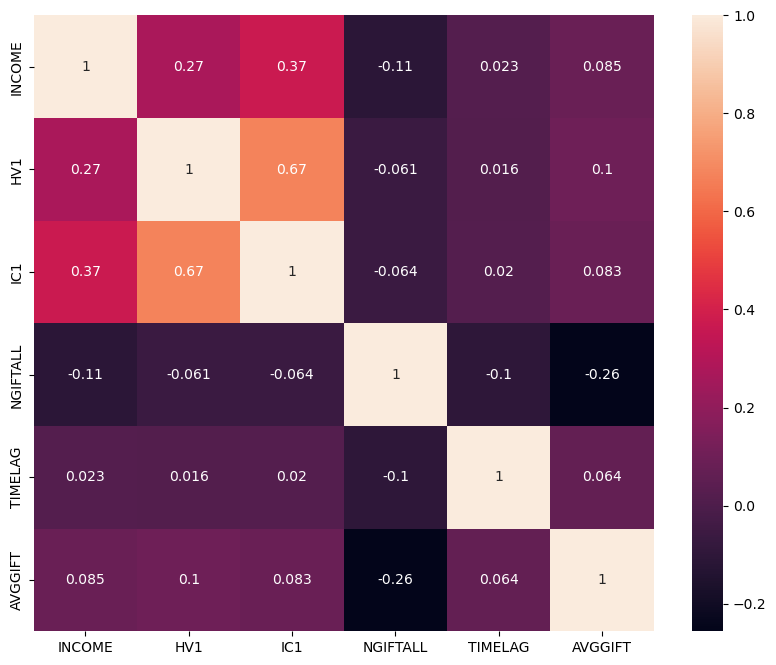

In [60]:
corr_matrix=data_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

1. Open the `categoricals` variable we created before.

```python
categoricals = data.select_dtypes(np.object)
categoricals.head()
```

2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
4. Plot time variable. Can you extract something from it?

In [61]:
data = pd.read_csv("./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")
data.columns = [col.lower().replace(' ', '_')  for col in data.columns]

In [62]:
categoricals = data.select_dtypes(np.object)
categoricals.head(2)

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize


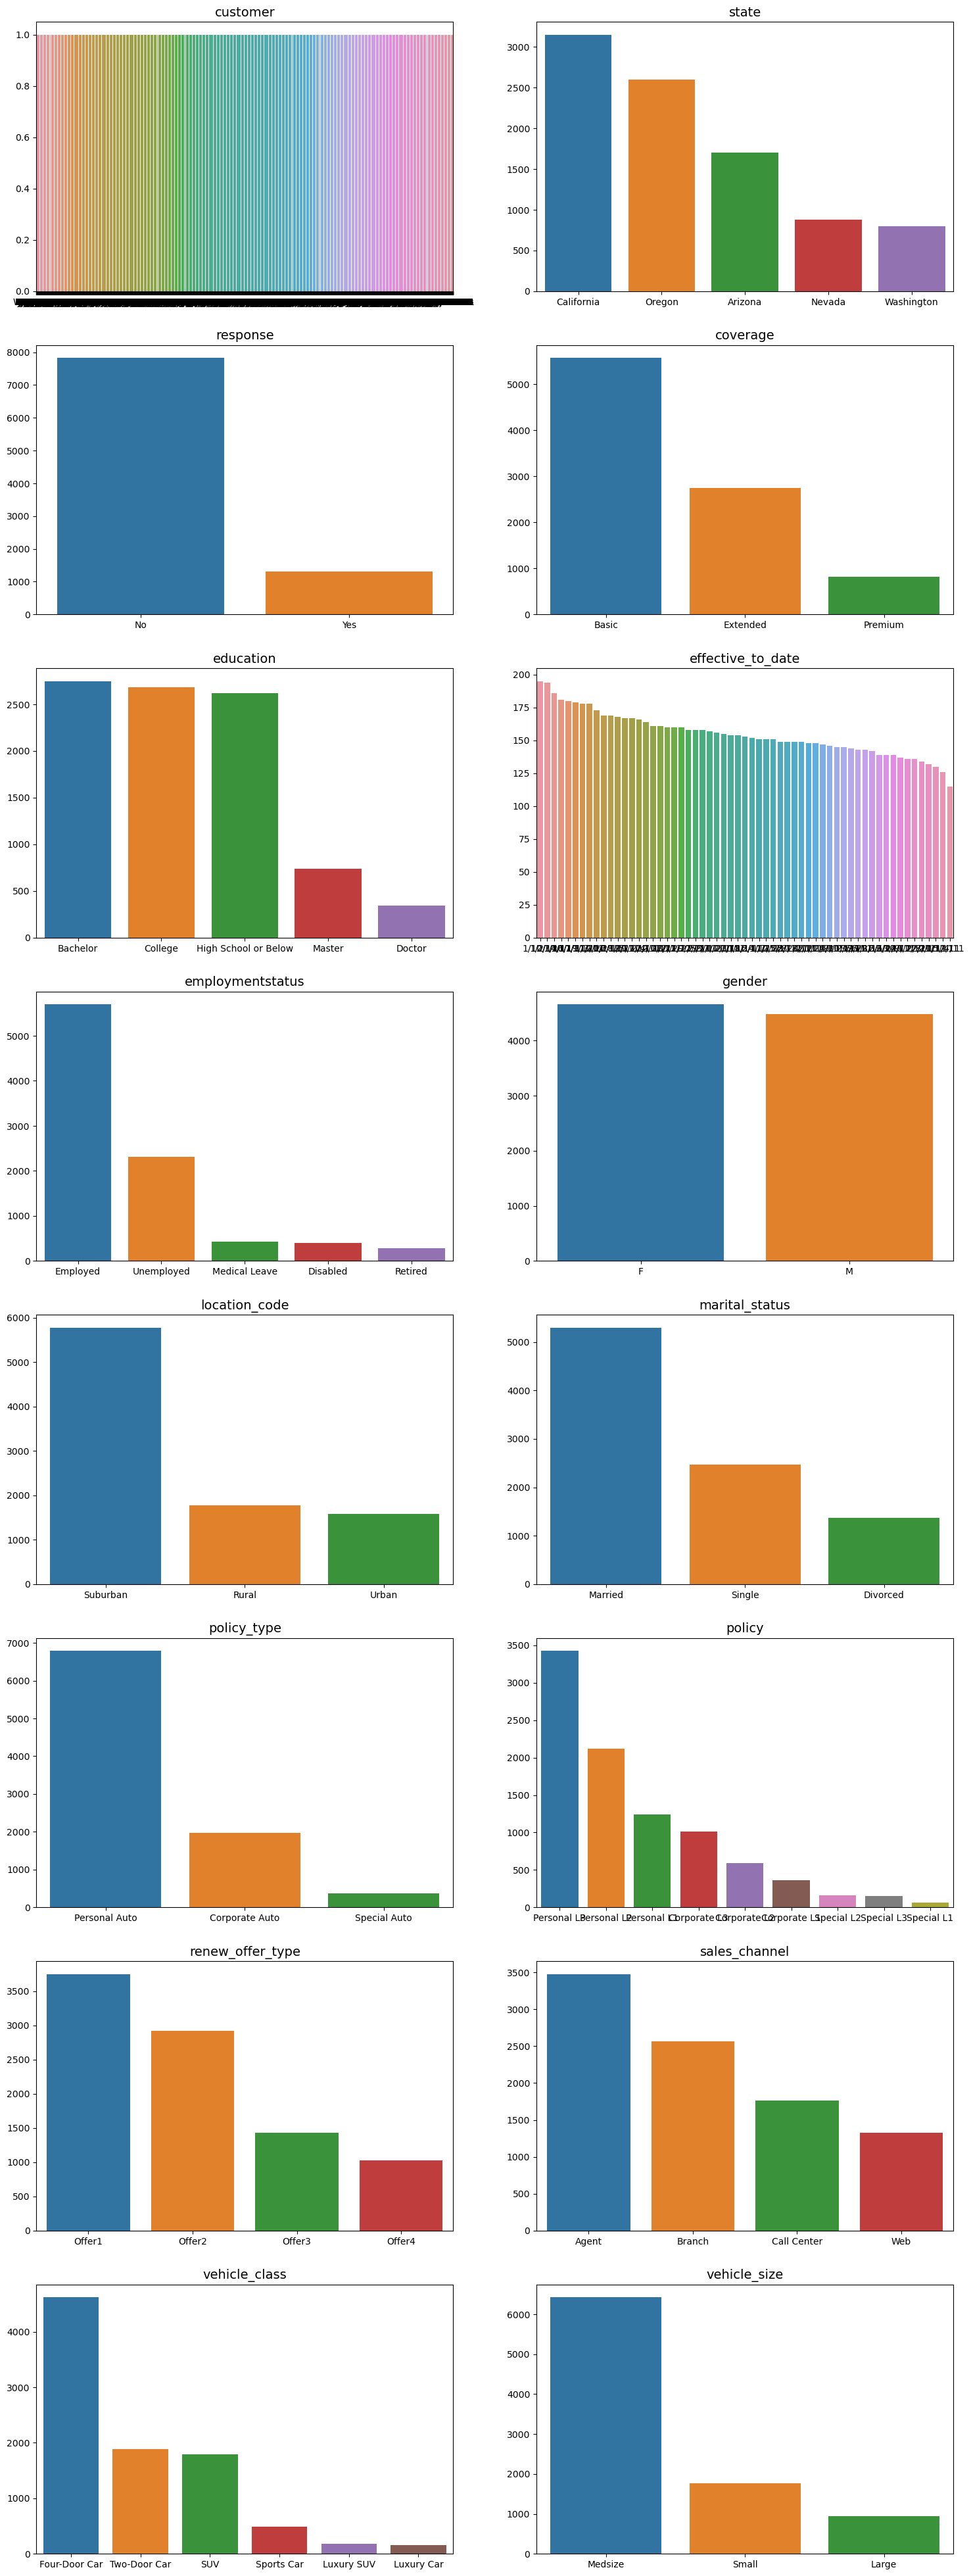

In [63]:
f, axes = plt.subplots(int(categoricals.shape[1] / 2), 2, figsize=(18, 50))

for i, col in enumerate(categoricals):

    sns.barplot(x = categoricals[col].value_counts().index,
                y = categoricals[col].value_counts(),
                ax=axes[int(i / 2)][int(i) % 2])
    axes[int(i / 2)][int(i) % 2].set_title(col, fontsize = 14)
    axes[int(i / 2)][int(i) % 2].set_ylabel("")

plt.show()

<AxesSubplot:ylabel='policy'>

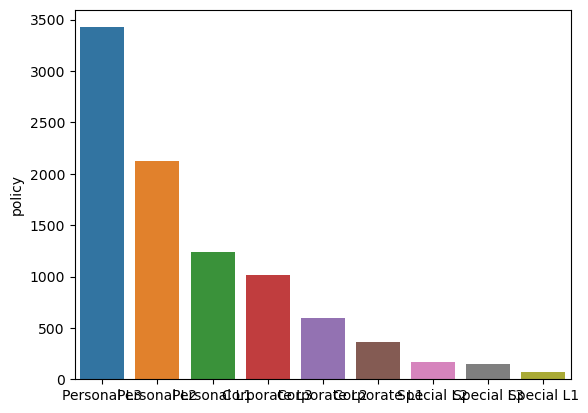

In [64]:
sns.barplot(x = categoricals["policy"].value_counts().index, y = categoricals["policy"].value_counts())

In [ ]:
# Education, employment status, policy, and vehicle class are somewhat unbalanced.
# For education we could turn it into a binary variable (college +-), but I wouldn't touch it.
# Policy is redundant, maybe we can classify it in L1, L2 and L3 groups
# Id concatenate luxury SUV, sports car and luxury car into luxury or among the other classes
# For employment we could divide them among employed, unemployed and inactive
# We can see that having open complaints isn't that common
# so we can turn it into a binary variable, open not open
# For the number of policies we could join use 1, 2, 3, 4+

In [65]:
# Check policy
categoricals["policy"].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [66]:
L = categoricals["policy"].apply(lambda x: x[-2:])
policy = categoricals["policy"].apply(lambda x: x[:-2])

In [67]:
# L looks like an independent variable

L.value_counts()

L3    4588
L2    2881
L1    1665
Name: policy, dtype: int64

In [68]:
L = categoricals["policy"].apply(lambda x: x[-2:])
policy = categoricals["policy"].apply(lambda x: x[:-2])

In [69]:
categoricals["coverage"].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [70]:
categoricals["marital_status"].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

In [71]:
policy.value_counts()

Personal      6788
Corporate     1968
Special        378
Name: policy, dtype: int64

In [72]:
categoricals["policy_type"].value_counts()

# As we thought at first this was kind of
# redundant, we will have to deal with it later on

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [73]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])

<AxesSubplot:xlabel='effective_to_date', ylabel='total_claim_amount'>

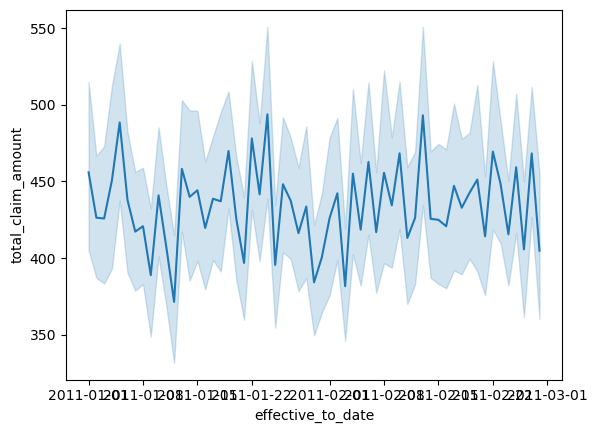

In [74]:
sns.lineplot(x="effective_to_date", y="total_claim_amount", data = data)

In [75]:
# Cant see clear pattern, would need to divide per day week month
time_df = pd.DataFrame()
time_df["day"] = data["effective_to_date"].dt.day
time_df["week"] = data["effective_to_date"].dt.week
time_df["month"] = data["effective_to_date"].dt.month
time_df["target"] = data["total_claim_amount"]

In [76]:
time_df['day'].unique()

array([24, 31, 19, 20,  3, 25, 18, 26, 17, 21,  6, 10,  5, 27, 14, 29, 28,
       12,  2,  7, 22, 13, 15,  8, 11, 23, 16,  9,  4,  1, 30],
      dtype=int64)

<AxesSubplot:xlabel='day', ylabel='target'>

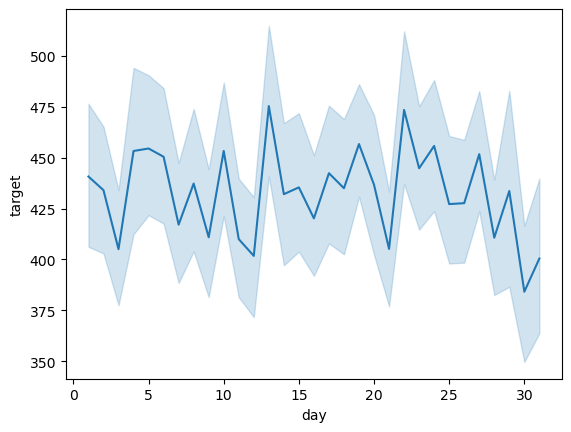

In [77]:
sns.lineplot(x="day", y="target", data = time_df)

### Additional Resources

[VIF_Application](https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python)